# Задание 2

In [1]:
# импортируем библиотеки и т.п
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from datetime import timedelta
import statistics 
from statistics import mean
from datetime import date
from datetime import datetime, time
import calendar

In [2]:
# загрузим таблицы
df_z1_sheet1 = pd.read_excel("table.xlsx")
df_z1_sheet2 = pd.read_excel("table.xlsx", sheet_name="z1-sheet2")
df_z1_sheet2_action = pd.read_excel("table.xlsx", sheet_name="z1-sheet2")

In [3]:
# Изменим название колонок

# N_dog - Номер договора start_date - Дата выдачи договора 
# index_city - Код города 
# summa_dog - Сумма договора к выдаче 
# term_dog - Срок договора 
# per - Годовая процентная ставка по договору, %

In [4]:
# Приведем таблицы к необходимому виду

# 1 таблица
df_z1_sheet1.drop(df_z1_sheet1.columns[[6, 7]], axis = 1, inplace = True) # удалим лишшние колонки
df_z1_sheet1.columns = ['N_dog', 'start_date', 'index_city', 'summa_dog', 'term_dog', 'per'] # переименуем колонки

# 2 таблица
df_z1_sheet2.drop(df_z1_sheet2.columns[[3,4,5,6]], axis = 1, inplace = True) # удалим лишшние колонки
df_z1_sheet2.columns = ['ind1', 'city', 'department'] # переименуем колонки

# 3 таблица
df_z1_sheet2_action = pd.read_excel("table.xlsx", sheet_name="z1-sheet2")
df_z1_sheet2_action.drop(df_z1_sheet2_action.columns[[0,1,2,3]], axis = 1, inplace = True)
w = df_z1_sheet2_action.head(4)
w.columns = ['in','per', 'name_per']

In [5]:
df_z1_sheet1.head(3)

,N_dog,start_date,index_city,summa_dog,term_dog,per
0,1,01.09.2017 10:03:40,23,30000,12,20
1,2,01.09.2017 10:08:09,8,5000,1,25
2,3,01.09.2017 10:11:41,9,3500,1,25


In [6]:
df_z1_sheet2.head(3)

,ind1,city,department
0,1,Новосибирск,Сибирь
1,2,Барнаул,Сибирь
2,3,Бийск,Сибирь


In [7]:
w.head(3)

,in,per,name_per
0,NaN,15.0,"Займ ""Привилегия"""
1,NaN,20.0,"Займ ""Для своих"""
2,NaN,25.0,"Займ ""Стандарт"""


In [8]:
# создадим единую таблицу
df = pd.merge(df_z1_sheet1, df_z1_sheet2, left_on="index_city", right_on="ind1").drop('ind1', axis=1)

# # приведем в необходимое соответствие формат данных  в колонках (формат даты и т.п.)

# сделаем тип float в колонке "per"
convert_dict = {'per': float} 
df = df.astype(convert_dict)

# объединим DF
df2 = pd.merge(df, w).drop('in', axis=1)

# приведем в необходимое соответствие формат данных  в колонках (формат даты и т.п.)
df2['start_date']= pd.to_datetime(df2['start_date'])
df2['start_date_n'] = df2['start_date'].dt.strftime('%d/%m/%Y')
df2['start_date_n']= pd.to_datetime(df2['start_date_n'])

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18609 entries, 0 to 18608
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   N_dog         18609 non-null  int64         
 1   start_date    18609 non-null  datetime64[ns]
 2   index_city    18609 non-null  int64         
 3   summa_dog     18609 non-null  int64         
 4   term_dog      18609 non-null  int64         
 5   per           18609 non-null  float64       
 6   city          18609 non-null  object        
 7   department    18609 non-null  object        
 8   name_per      18609 non-null  object        
 9   start_date_n  18609 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 1.6+ MB


# ============ графики ============================

In [10]:
df_1 = df2.groupby('department')['summa_dog'].sum().reset_index()
# df_field_number_students_course.columns = ['field','title', 'number_students'] # дадим соответствующие имена колонок
df_1.sort_values(('summa_dog'), ascending=True, inplace=True) # отсортируем

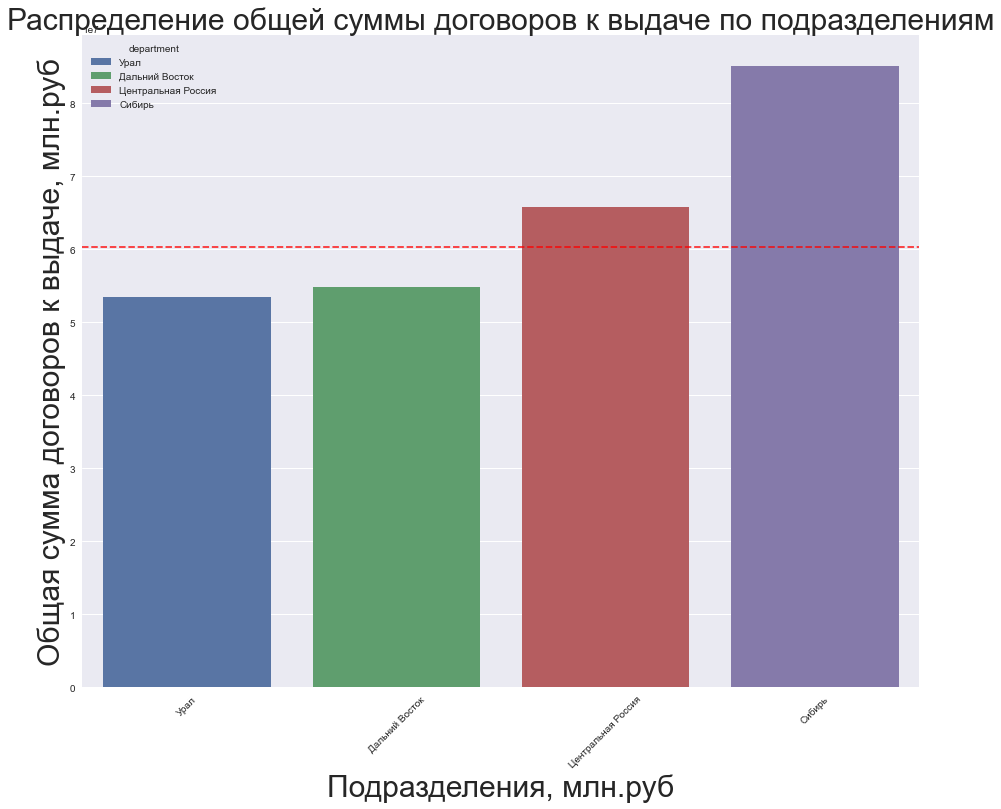

In [11]:
number_median = statistics.median(list(df_1.summa_dog)) # определим median

# горизонтальный график
fig, ax = plt.subplots(figsize=(15,12))
sns.barplot(x=df_1.department, 
            y=df_1.summa_dog,  
            hue=df_1.department, dodge=False)
ax.set_title('Распределение общей суммы договоров к выдаче по подразделениям', fontsize=30)
ax.set_xlabel('Подразделения, млн.руб', fontsize=30)
ax.set_ylabel('Общая сумма договоров к выдаче, млн.руб', fontsize=30)
plt.xticks(rotation=45)
ax.axhline(y=number_median, linestyle='--', color='r', alpha=0.8)
plt.show()

# ==============================================================

In [12]:
df_3 = df2.groupby(['city', 'department'])['summa_dog'].sum().reset_index()
df_3.sort_values(('summa_dog'), ascending=True, inplace=True) # отсортируем

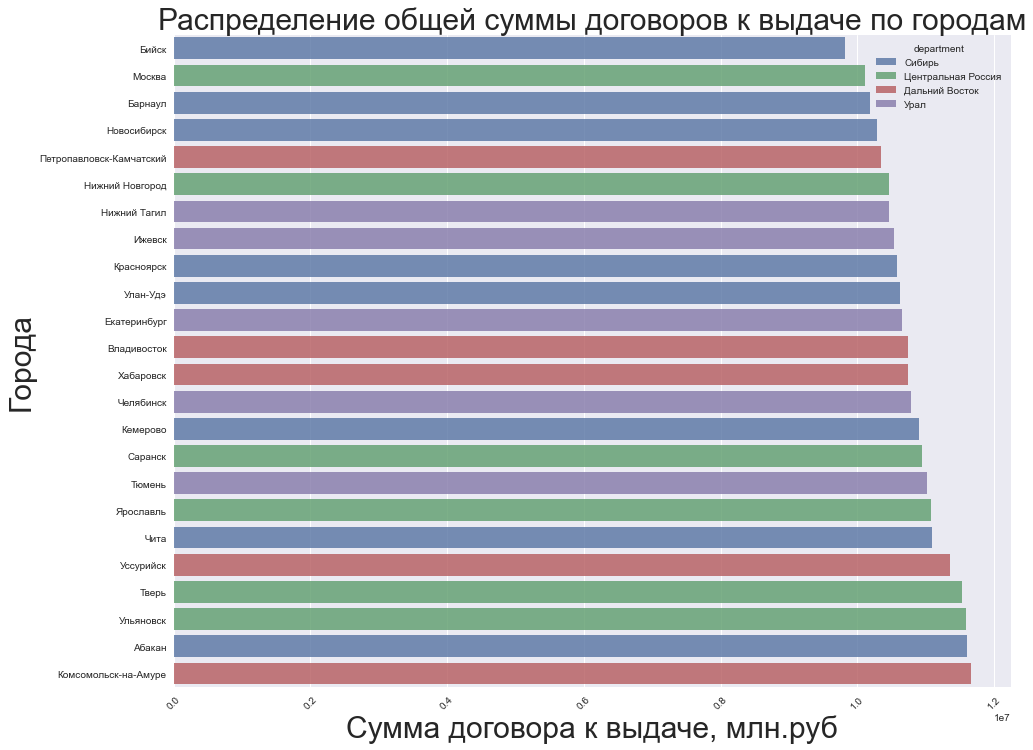

In [13]:
# горизонтальный график
fig, ax = plt.subplots(figsize=(15,12))
sns.barplot(x=df_3.summa_dog, 
            y=df_3.city, ax=ax, 
            hue=df_3.department, dodge=False, alpha = 0.81)
ax.set_title('Распределение общей суммы договоров к выдаче по городам', fontsize=30)
ax.set_xlabel('Сумма договора к выдаче, млн.руб', fontsize=30)
ax.set_ylabel('Города', fontsize=30)
plt.xticks(rotation=45)
plt.show()

# =========================================

In [14]:
df_3 = df2.groupby(['name_per', 'per'])['summa_dog'].sum().reset_index()
# df_field_number_students_course.columns = ['field','title', 'number_students'] # дадим соответствующие имена колонок
df_3.sort_values(('summa_dog'), ascending=True, inplace=True) # отсортируем

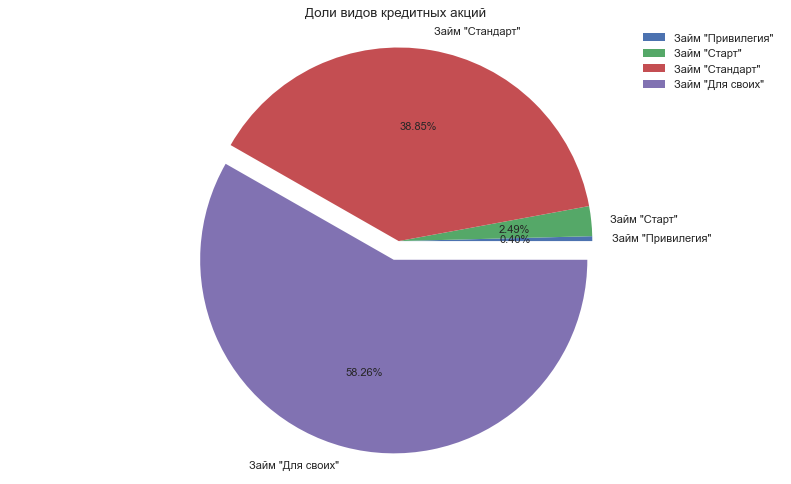

In [15]:
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1000 / dpi, 600 / dpi) )
plt.pie(list(df_3['summa_dog']), labels=list(df_3['name_per']), autopct='%1.2f%%', explode=(0, 0, 0, 0.1), startangle=0) 
plt.axis('equal')
plt.title('Доли видов кредитных акций' )
plt.legend()
plt.show()

# =====================================

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


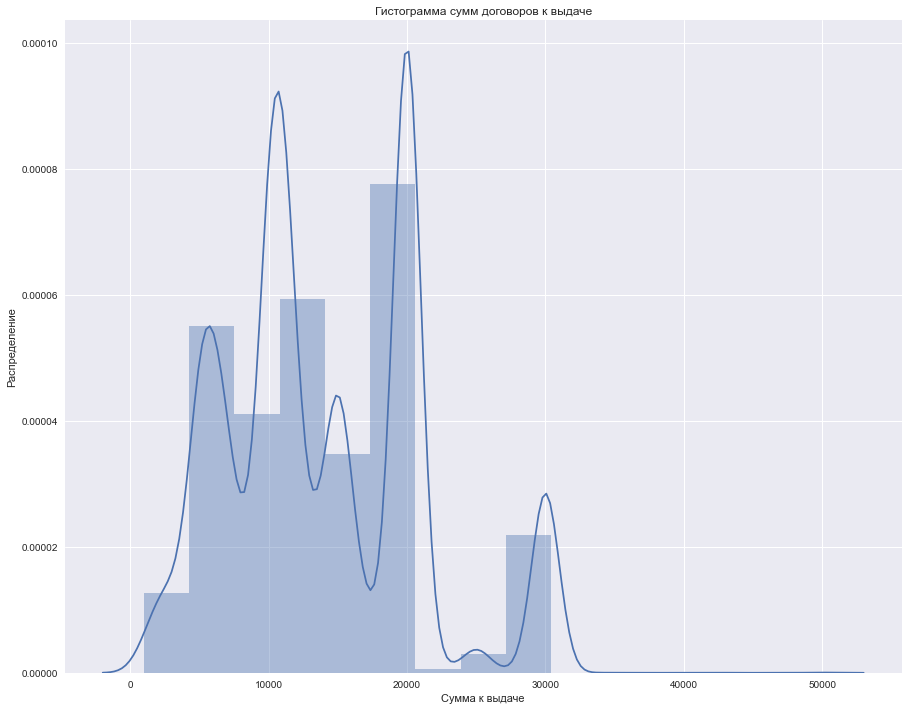

In [16]:
fig, ax = plt.subplots(figsize=(15,12))
sns_plot = sns.distplot(df2.summa_dog, bins=15, ax=ax)
fig = sns_plot.get_figure()
ax.set_title('Гистограмма сумм договоров к выдаче')
ax.set_xlabel('Сумма к выдаче')
ax.set_ylabel('Распределение')
plt.show()

# ===============================================

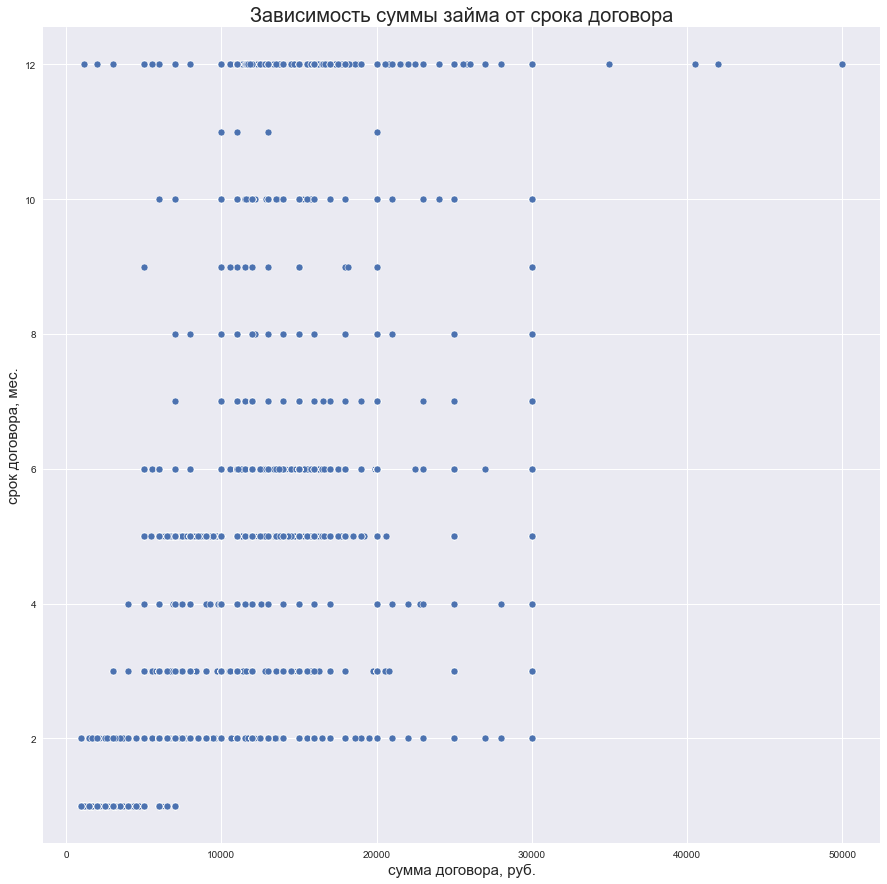

In [17]:
# точечная диаграмма
data = df2
fig, ax = plt.subplots(figsize=(15,15))

sns.scatterplot(data=data, x='summa_dog', y='term_dog', ax=ax)
ax.set_title('Зависимость суммы займа от срока договора').set_size(20)
ax.set_xlabel('сумма договора, руб.').set_size(15)
ax.set_ylabel('срок договора, мес.').set_size(15)

In [18]:
# табличное представление данных
df_7 = df2.groupby(['term_dog'])['summa_dog'].sum().reset_index()
df_7.sort_values(('summa_dog'), ascending=True, inplace=True) # отсортируем по сумме
df_7

,term_dog,summa_dog
10,11,54000
8,9,429263
6,7,1394049
7,8,1508150
3,4,3686299
9,10,5213547
0,1,10995599
2,3,16754683
5,6,34587861
1,2,35583591


# ====================================

In [19]:
df2['day_of_week'] = df2['start_date_n'].dt.day_name() # создадим колонку с днем недели

In [20]:
df_5 = df2.groupby(['day_of_week'])['summa_dog'].sum().reset_index() # 

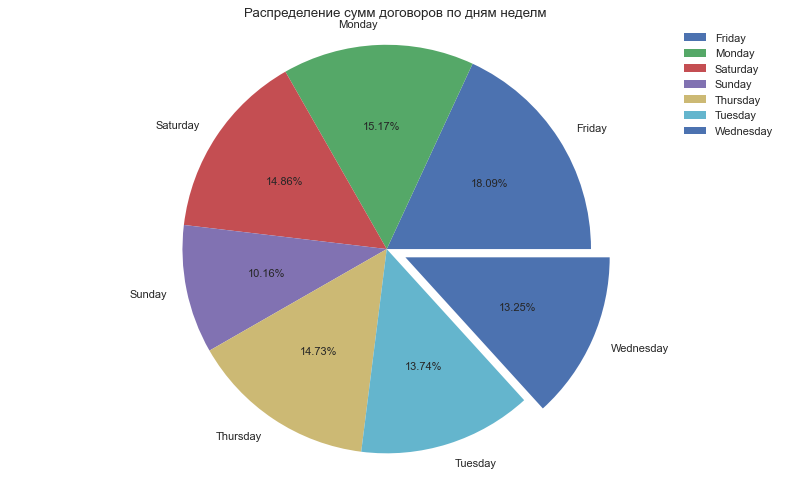

In [21]:
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1000 / dpi, 600 / dpi) )
plt.pie(list(df_5.summa_dog), labels=list(df_5.day_of_week),autopct='%1.2f%%', explode=(0, 0, 0, 0,0,0, 0.1), startangle=0) 
plt.axis('equal')
plt.title('Распределение сумм договоров по дням неделм' )
plt.legend()
plt.show()

# =================================

# дополнительная информация
найдем в каком городе, на какой день недели приходится максимум по обшей сумме договоров  

In [22]:
df_33 = df2.groupby(['city','day_of_week'])['summa_dog'].sum().reset_index()
df_big = df_33.groupby(['city'])['summa_dog'].max().reset_index()
df_w = pd.merge(df_33, df_big, how='inner')
df_w

,city,day_of_week,summa_dog
0,Абакан,Friday,2230238
1,Барнаул,Thursday,1708300
2,Бийск,Friday,2030000
3,Владивосток,Friday,2022500
4,Екатеринбург,Friday,1977200
5,Ижевск,Friday,1808500
6,Кемерово,Friday,1822550
7,Комсомольск-на-Амуре,Friday,2166700
8,Красноярск,Friday,1821100
9,Москва,Monday,1722166


In [23]:
# выгрузим эту таблицу
df_w.to_excel('week_sum.xlsx', index_label='index')

# Выводы
1. Наибольшая общая сумма договоров к выдаче приходится на регион Сибирь, наименьшая на Урал.
2. Судя по гистограмме наибольшое количество договоров находится в диапазоне 10 - 20 тыс.р. При необходимости можно самим назначить рассматриваемый диапазон и более детально его рассмотреть.
3. Самый популярный день недели (наибольшая общая сумма договора) приходится на пятницу, хотя не во всех городах. В таблице df_w предсталена более детальная картина.
4. Самый непопулярный срок 11 мес на него приходится 54000 рублей, см. таблицу df_7
5. Займ "Привилегия" действительно получился таковой, доля всего 0.4 % Необходимо посмотреть условия акции
6. Четкой зависимости между сроком займа и суммой займа нет. Концентрация точек большая как на 12 м оси так и на полугодовой.